<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Exponential_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib seaborn statsmodels --user -q --no-warn-script-location


  Preparing metadata (setup.py) ... done


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
date=pd.date_range(start='1/1/1949',end='12/31/1960',freq='M') ## Using frequency as monthly
date

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [7]:
df['date_time']=date

In [8]:
df.head()

,Month,#Passengers,date_time
0,1949-01,112,1949-01-31
1,1949-02,118,1949-02-28
2,1949-03,132,1949-03-31
3,1949-04,129,1949-04-30
4,1949-05,121,1949-05-31


In [9]:
df.drop('Month',axis=1,inplace=True)

In [10]:
df.shape()

TypeError: ignored

In [11]:
df.drop('Month',axis=1,inplace=True) ## Dropping object type feature from the data

KeyError: ignored

In [12]:
df.shape

(144, 2)

In [13]:
df.head()

,#Passengers,date_time
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


In [14]:
df=df.set_index('date_time')

In [15]:
df.head()

,#Passengers
date_time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-31 to 1960-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


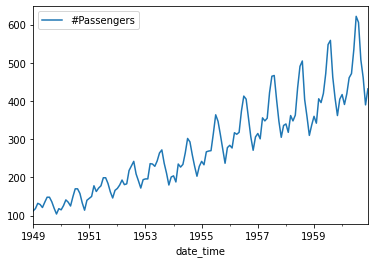

In [17]:
df.plot()

In [18]:
train_end = datetime(1959,12,31)
test_end = datetime(1960,12,31)

In [19]:
train = df[:train_end]
test = df[train_end + timedelta(days=1):test_end]

In [20]:
ses_mod=SimpleExpSmoothing(train,initialization_method='estimated')

In [21]:
ses_fit=ses_mod.fit(optimized=True)

In [22]:
ses_pred=ses_fit.forecast(len(test))

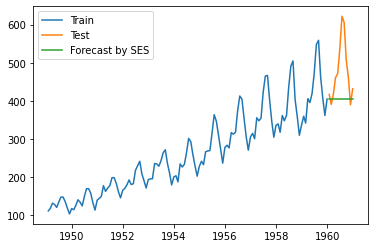

In [23]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(ses_pred,label='Forecast by SES')
plt.legend(loc='best')
plt.show()

In [24]:
des_mod=Holt(train,exponential=True,initialization_method='estimated')

In [25]:
des_fit=des_mod.fit(optimized='True')

In [26]:
des_pred= des_fit.forecast(steps=len(test))

In [28]:
#Forecasted Value Visualization

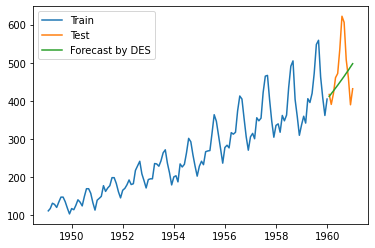

In [30]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(des_pred,label='Forecast by DES')
plt.legend(loc='best')
plt.show()

In [31]:
#Triple Exponential Smooting

In [32]:
tes_mod=ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [33]:
tes_fit=tes_mod.fit(optimized='True')

In [34]:
tes_pred=tes_fit.forecast(len(test))

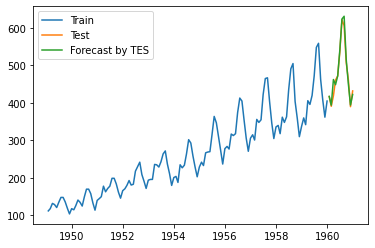

In [35]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(tes_pred,label='Forecast by TES')
plt.legend(loc='best')
plt.show()

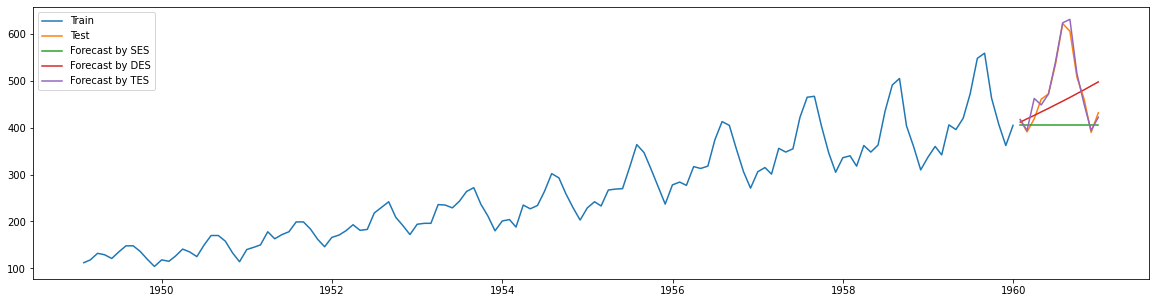

In [36]:
plt.figure(figsize=(20,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(ses_pred,label='Forecast by SES')
plt.plot(des_pred,label='Forecast by DES')
plt.plot(tes_pred,label='Forecast by TES')
plt.legend(loc='best')
plt.show()